In [7]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

ea = EventAccumulator("checkpoint/tensorboard/version_9")
ea.Reload()
print(ea.Tags())


{'images': [], 'audio': [], 'histograms': [], 'scalars': ['hp_metric', 'lr-AdamW/pg1', 'lr-AdamW/pg2', 'train/loss', 'train/base_loss', 'train/semantic_loss', 'train/top_5_accuracy', 'train/grad_norm', 'epoch', 'val/loss', 'val/base_loss', 'val/semantic_loss', 'val/top_5_accuracy'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}


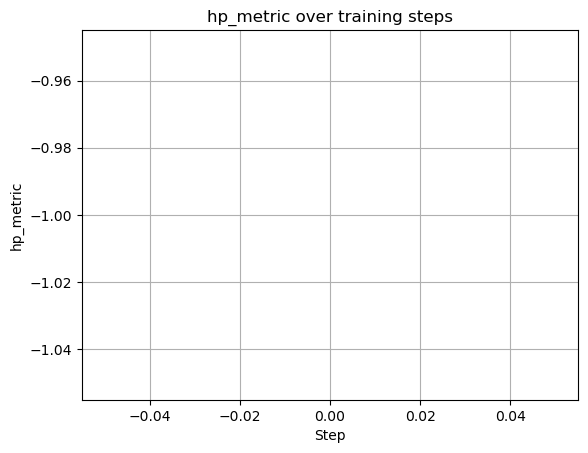

In [6]:
import matplotlib.pyplot as plt

events = ea.Scalars("hp_metric")
steps = [e.step for e in events]
values = [e.value for e in events]

plt.plot(steps, values)
plt.title("hp_metric over training steps")
plt.xlabel("Step")
plt.ylabel("hp_metric")
plt.grid()
plt.show()


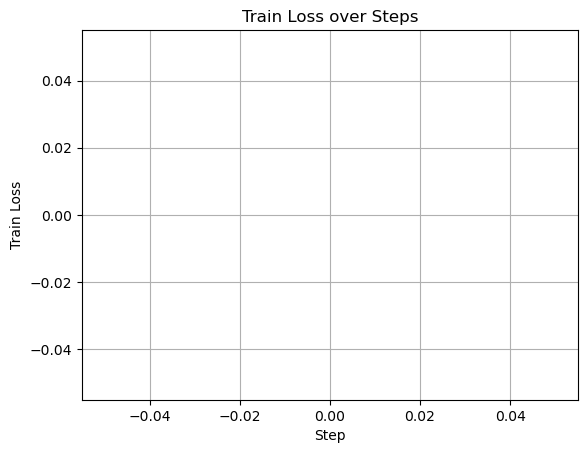

In [5]:
import re
import matplotlib.pyplot as plt

steps, losses = [], []

with open("checkpoint/train.log", "r", encoding="utf-8") as f:
    for line in f:
        match = re.search(r"step=(\d+).*?loss=([0-9.]+)", line)
        if match:
            steps.append(int(match.group(1)))
            losses.append(float(match.group(2)))

plt.plot(steps, losses)
plt.xlabel("Step")
plt.ylabel("Train Loss")
plt.title("Train Loss over Steps")
plt.grid()
plt.show()


In [ ]:
!wandb login
